In [5]:
import pandas as pd
# первым делом импортируем библиотеку, для краткости присвоим ей имя pd

In [6]:
# т.к. у нас файл csv, то используем встроенную функцию для чтения csv файлов
data = pd.read_csv('04-13-2020.csv', index_col='Country_Region') # сразу назначим индекс название страны
# посмотрим, какие данные хранит в себе наш датафрейм
data.head() # выводит 5 первых значений
data.sample(3) # выводит 3(аргумент количества в скобках) случайных значения, по-умолчанию 1
data.tail() # выводит 5 последних значений
data


,FIPS,Admin2,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
Country_Region,,,,,,,,,,,
US,45001.0,Abbeville,South Carolina,2020-04-13 23:07:54,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US"
US,22001.0,Acadia,Louisiana,2020-04-13 23:07:54,30.295065,-92.414197,101,5,0,96,"Acadia, Louisiana, US"
US,51001.0,Accomack,Virginia,2020-04-13 23:07:54,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US"
US,16001.0,Ada,Idaho,2020-04-13 23:07:54,43.452658,-116.241552,517,6,0,511,"Ada, Idaho, US"
US,19001.0,Adair,Iowa,2020-04-13 23:07:54,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,2020-04-13 23:07:34,31.952200,35.233200,308,2,58,248,West Bank and Gaza
Western Sahara,NaN,NaN,NaN,2020-04-13 23:07:34,24.215500,-12.885800,6,0,0,6,Western Sahara
Yemen,NaN,NaN,NaN,2020-04-13 23:07:34,15.552727,48.516388,1,0,0,1,Yemen


In [7]:
# узнаем, сколько в нашем фрейме столбцов и строк
data.shape

(3002, 11)

In [8]:
# какие столбцы есть в нашем фрейме
data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key'],
      dtype='object')

In [9]:
# сразу удалим ненужные, с которыми мы не планируем работать
data = data.drop(['FIPS', 'Admin2', 'Last_Update', 'Province_State', 'Lat', 'Long_', 'Combined_Key'], axis=1)
data

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,9,0,0,9
US,101,5,0,96
US,15,0,0,15
US,517,6,0,511
US,1,0,0,1
...,...,...,...,...
West Bank and Gaza,308,2,58,248
Western Sahara,6,0,0,6
Yemen,1,0,0,1


In [10]:
# мне не интересно смотреть в каком именно городе в US заражены, поэтому создам новый фрейм, в котором сгруппирую по странам
data_country = data.groupby('Country_Region').sum() # сейчас в эту строку не нужно вникать, позже всё само поймется
data_country

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,665,21,32,612
Albania,467,23,232,212
Algeria,1983,313,601,1069
Andorra,646,29,128,489
Angola,19,2,4,13
...,...,...,...,...
West Bank and Gaza,308,2,58,248
Western Sahara,6,0,0,6
Yemen,1,0,0,1


In [11]:
# Теперь можем приступить к исследованию наших данных
data_country.describe() # покажет нам количество, среднее значение, отклонение, минимальное\максимальное значение и процентиль.
# Для общего понимания что такое процентиль посмотрим на пример ниже.

,Confirmed,Deaths,Recovered,Active
count,185.000000,185.000000,185.000000,185.000000
mean,10363.891892,645.854054,2425.162162,7844.227027
std,48755.551580,2983.315967,10383.594788,47318.456792
min,1.000000,0.000000,0.000000,1.000000
25%,45.000000,1.000000,5.000000,31.000000
50%,467.000000,8.000000,62.000000,309.000000
75%,2919.000000,78.000000,319.000000,2421.000000
max,580619.000000,23529.000000,78039.000000,615608.000000


In [12]:
a = [1,2,3,4,145,145,165,164,6666,6647,3734,3734,3734]
data_a = pd.DataFrame(a)
data_a.describe()

# теперь всё стало понятно, это просто наш список в точках 25,50,75.


,0
count,13.000000
mean,1934.153846
std,2612.633883
min,1.000000
25%,4.000000
50%,164.000000
75%,3734.000000
max,6666.000000


In [13]:
# Выводить датафрейм мы научились, заглянули внутрь, но не всегда мне понадобиться целый фрейм. Выберу только колонк со странами.
data_country['Deaths'] # это обычный вид датафрейма, но я хочу посмотреть всё что в нем есть, полистать и насладиться видом

Country_Region
Afghanistan            21
Albania                23
Algeria               313
Andorra                29
Angola                  2
                     ... 
West Bank and Gaza      2
Western Sahara          0
Yemen                   0
Zambia                  2
Zimbabwe                3
Name: Deaths, Length: 185, dtype: int64

In [14]:
data_country['Deaths'].reset_index()
# просто сбросим индексы, в обычной консоле мы всё равно не получили бы такой вид, это фишка только для виртуальных ноутбуков.
# иногда сброс индексов необходим, в случаях извлечения данных после анрегаций и тд.


,Country_Region,Deaths
0,Afghanistan,21
1,Albania,23
2,Algeria,313
3,Andorra,29
4,Angola,2
...,...,...
180,West Bank and Gaza,2
181,Western Sahara,0
182,Yemen,0
183,Zambia,2


In [15]:
# что если я хочу посмотреть 2 колонки? в квадратных скобках нам нужно указать список столбцов: ['col1', 'col2']
data_country[['Deaths', 'Confirmed']].sample(7) # как мы уже умеем, выведем случайных 7 значений.

,Deaths,Confirmed
Country_Region,,
Chile,82,7525
Seychelles,0,11
Czechia,143,6059
Ghana,8,566
Morocco,126,1763
Angola,2,19
West Bank and Gaza,2,308


In [16]:
# кстати, мы можем выводить не только колонки, но и строки.
data_country.loc['Ukraine'] # с помощью loc мы пишем имя индекса(в нашем случае название страны)


Confirmed    3102
Deaths         93
Recovered      97
Active       2912
Name: Ukraine, dtype: int64

In [17]:
# так же я могу вывести просто по счету 1-10 страны
data_country.iloc[range(0,10)] # 1,2,3,4,5... т.е. с помощью iloc мы пишем не имя, а порядковый номер

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,665,21,32,612
Albania,467,23,232,212
Algeria,1983,313,601,1069
Andorra,646,29,128,489
Angola,19,2,4,13
Antigua and Barbuda,23,2,0,21
Argentina,2208,97,515,1596
Armenia,1039,14,211,814
Australia,6351,61,1806,4484


In [18]:
data_country.loc['Ukraine', 'Confirmed'] # кстати, мы же можем обратиться и по колонке, и по строке
# data_country.loc[['Ukraine', 'Russia']]  # для вывода 2 стран, не забываем про вложенный список
# data_country.loc['Ukraine', 'Russia'] # вот что будет если забудем про список, Russia ищется как название столбца
# data_country.loc[['Ukraine', 'Russia'], 'Confirmed'] # не совсем удобная запись оказыввается, можно и запутаться
# data_country.loc['Ukraine']['Confirmed'] # если мы отделим это в разные списки, так становится куда проще
# data_country.loc[['Ukraine', 'Russia']]['Confirmed']


3102

In [19]:
# перейдем к условиям. Я конечно помню, что в Украине больше 3х тысяч зараженных, но как узнать в каких странах так же больше 3ти тысяч
filter_count = data_country['Confirmed'] > 3000
# в данном случае нам возвращается серия значений True\False, который мы можем использовать как условие.
# будет ли выводиться данное значение с фрейма(Да\Нет)
data_country[filter_count]

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Australia,6351,61,1806,4484
Austria,14041,368,7343,6330
Belgium,30589,3903,6707,19979
Brazil,23430,1328,173,21929
Canada,25680,780,7758,17142
Chile,7525,82,2367,5076
China,83213,3345,78039,1829
Czechia,6059,143,519,5397
Denmark,6513,285,2403,3825


In [20]:
# теперь хочу узнать в каких из этих стран число умерших больше числа выживших
filter_death = data_country['Deaths'] > data_country['Recovered']
data_country[filter_count & filter_death] # всё просто, с помощью логического оператора &

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Brazil,23430,1328,173,21929
Dominican Republic,3167,177,152,2838
Indonesia,4557,399,380,3778
Ireland,10647,365,25,10257
Netherlands,26710,2833,295,23582
Norway,6603,134,32,6437
Panama,3400,87,29,3284
Philippines,4932,315,242,4375
Portugal,16934,535,277,16122


In [21]:
# ну ладно, название стран я увидел, их действительно много, сейчас посчитаем
data_country['Confirmed'].count() # стоит сказать что мы могли применить просто shape[0] или len(df.index), но изучаем агрегирование


185

In [22]:
# А сколько в мире черовек умерло и выздоровило?
data_country[['Deaths', 'Recovered']].sum()

Deaths       119483
Recovered    448655
dtype: int64

In [23]:
# применим напиш знания условий и агрегирования для решения чего-то более адекватного
# Найдем всё те же страны где умерших больше. Посмотрим на сумму умерших и выздоровивших и на среднее цисло зараженных в данный момент
filter_death = data_country['Deaths'] > data_country['Recovered']
data_filtered = data_country[filter_count & filter_death]
data_filtered.agg({'Deaths': 'sum', 'Recovered': 'sum', 'Active': 'mean'})


Deaths       18524.000000
Recovered     2290.000000
Active       15344.833333
dtype: float64

In [24]:
# Отступление не в тему вынести в отдельный файл
prog = data_country.loc[['Brazil', 'Dominican Republic', 'Indonesia', 'Ireland', 'Netherlands','Norway', 'Panama', 'Philippines', 'Portugal', 'Serbia', 'Sweden','United Kingdom']]
prog_sum = prog.sum()
prog_was = prog_sum[1]+prog_sum[2]

will_recovered = prog_sum[2]*prog_sum[0]/prog_was
will_death = prog_sum[1]*prog_sum[0]/prog_was
print(will_death, will_recovered)


ua = data_country.loc['Ukraine']
ua_was = ua[1]+ua[2]
ua_r = ua[2].sum()*ua[0].sum()/ua_was
ua_d = ua[1].sum()*ua[0].sum()/ua_was
print(ua_d, ua_r)

182402.75045642356 22549.24954357644
1518.3473684210526 1583.6526315789474


In [25]:
# Возьмем наши страны и отсортируем по количесту подтвержденных случаев от большего к меньшему
data_filtered.sort_values(by='Confirmed', ascending=False) # по индексам кстати можно так же сортировать, sort_index


,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
United Kingdom,89570,11347,304,77919
Netherlands,26710,2833,295,23582
Brazil,23430,1328,173,21929
Portugal,16934,535,277,16122
Sweden,10948,919,381,9648
Ireland,10647,365,25,10257
Norway,6603,134,32,6437
Philippines,4932,315,242,4375
Indonesia,4557,399,380,3778


In [26]:
# Давайте попробуем посчитать количество стран, где нет выздоровивших и отдельно где нет умерших
filter_norecovered = data_country['Recovered'] == 0
filter_nodeath = data_country['Deaths'] == 0
data_country[filter_norecovered]['Recovered'].count(), data_country[filter_nodeath]['Deaths'].count()

(22, 34)

In [27]:
# пришло время мощнейшего инструмента, df.query. Решим задачу выше с помощью query (и удивимся простоте кода)
data_country.query('Deaths == 0')['Deaths'].count(), data_country.query('Recovered == 0')['Recovered'].count()
# данные вывер не в том порядке, но сама суть query в том, что мы не строим ужасные фильтры, а пишем кратко и красиво

(34, 22)

In [28]:
# немного попроактикуемся снова
# найдем страну, в которой максимальное количество зараженных и выведем сколько людей умерло
max_conf = data_country['Confirmed'].max()
data_country.query('Confirmed == @max_conf')['Deaths']



Country_Region
US    23529
Name: Deaths, dtype: int64

In [29]:
# вот сейчас будет что-то более интересное, в кратце: найти страны где зараженных больше 5000, присвоить им отдельную колонку
# выведем количество стран, где зараженных меньше нашей границы, и нарисуем произвольный график

# import numpy as np
# filt_more_active = np.where(data_country['Active'] > 5000) # возвращает порядковый номер элемента
# data_country.iloc[filt_more_active] # помним, что iloc обращается по порядковому номеру
# варианты как искользовать те же самые условия через numpy()

filt_more_active = data_country['Active'] > 5000
list_more_active = data_country[filt_more_active].index # создаем список стран в которык число активно зараженных больше 5000
print(list_more_active, len(list_more_active), sep='\n')
data_country['iter'] = 0 # добавляем новую колонку и заполняем нулями
# пройдем по каждому эллементу индекса фрейма, если он находится в нашем списке list_more_active, то элемент с колонки iter меняется на 10
for l in data_country.index:
    if l in list_more_active:
        data_country.loc[l]['iter'] = 1


data_country # посмотрим что получилось
data_country['iter'].sum()

Index(['Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Czechia', 'Ecuador',
       'France', 'Germany', 'India', 'Iran', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Netherlands', 'Norway', 'Peru', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US',
       'United Kingdom'],
      dtype='object', name='Country_Region')
28


28

In [30]:
import matplotlib.pyplot as plt
import numpy as np

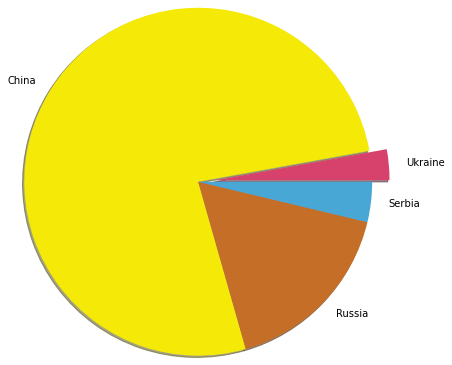

In [31]:
labels = ['Ukraine', 'China', 'Russia', 'Serbia']
values = [data_country.loc['Ukraine']['Confirmed'], data_country.loc['China']['Confirmed']
         ,data_country.loc['Russia']['Confirmed'], data_country.loc['Serbia']['Confirmed']]

plt.pie(values, labels = labels, radius = 2, explode = [0.2,0,0,0],colors = ['#d6426c','#f5e907','#c46e27','#48a7d4'], shadow = True)
plt.show()